In [10]:
from acoustic_feature import *

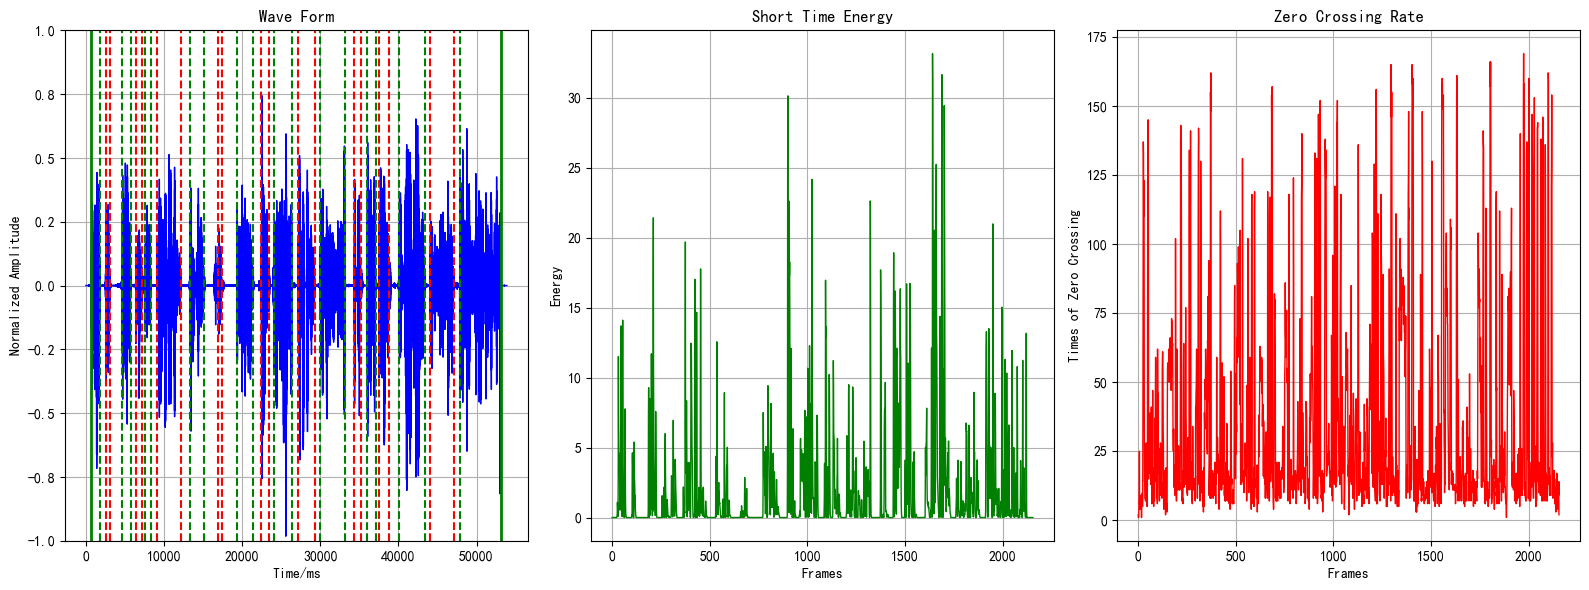

In [11]:
vad = VAD(r'D:\Projects\Speech_Depression\data\audio_wav\13193950052_2020_10_08.wav', min_interval=15, pt=False)
vad.plot()

In [14]:
wave_file_vad = r'D:\Projects\Speech_Depression\data\audio_wav_vad\13193950052_2020_10_08_vad.wav'

AttributeError: 'AxesParasite' object has no attribute '_axislines'

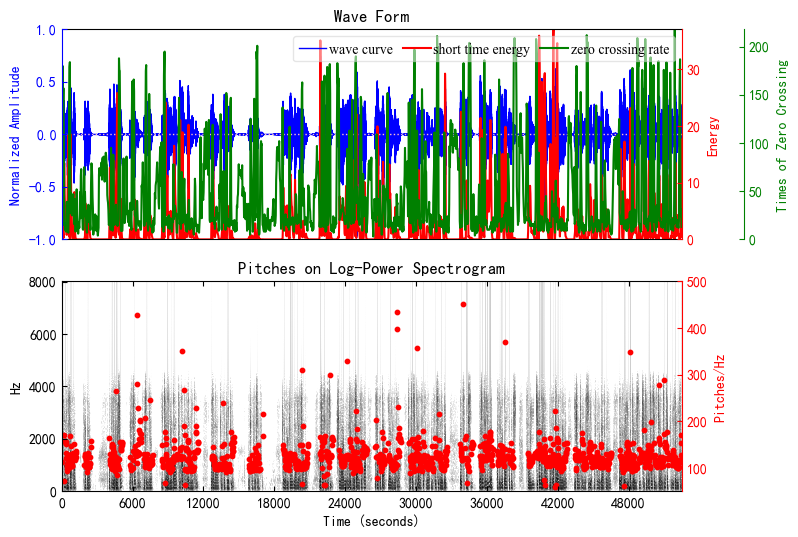

In [15]:
# 韵律学特征
rhythm_f = RhythmFeatures(wave_file_vad)
rhythm_f.plot()

In [2]:
# 读取AMR格式文件
input_file = "D:\\PycharmProjects\\Speech_Depression\\test.amr"

audio = AudioSegment.from_file(input_file, format="amr")

# 将AMR格式文件转换为其他格式（WAV）

audio.export("output.wav", format="wav")

<_io.BufferedRandom name='output.wav'>

In [3]:
audio_data = r"output.wav"
x, sr = librosa.load(audio_data, sr=None)  # x为音频数据，sr为采样率(不设置sr=None会重采样到22050)
print(x.shape, sr)

(1188054,) 22050


In [5]:
print("audio_data:", x, "\n")
print("audio_data shape:", np.shape(x), "\n")
print("Sample Rate:", sr, "\n")
print("Check Len of Audio:", np.shape(x)[0] / sr)

audio_data: [9.3146227e-06 1.1895783e-05 5.5562705e-06 ... 4.4274144e-05 6.6119246e-05
 5.7319179e-05] 

audio_data shape: (431040,) 

Sample Rate: 8000 

Check Len of Audio: 53.88


- 获得音频的时长

In [4]:
len_of_audio = librosa.get_duration(
    y=x, sr=sr, S=None, n_fft=2048, hop_length=512, center=True, filename=None
)
len_of_audio

OSError: cannot load library 'libsndfile.dll': error 0x7e

- 获得采样率，原始数据的sr

In [7]:
sr = librosa.get_samplerate(audio_data)
sr

8000

- 去除两端沉默

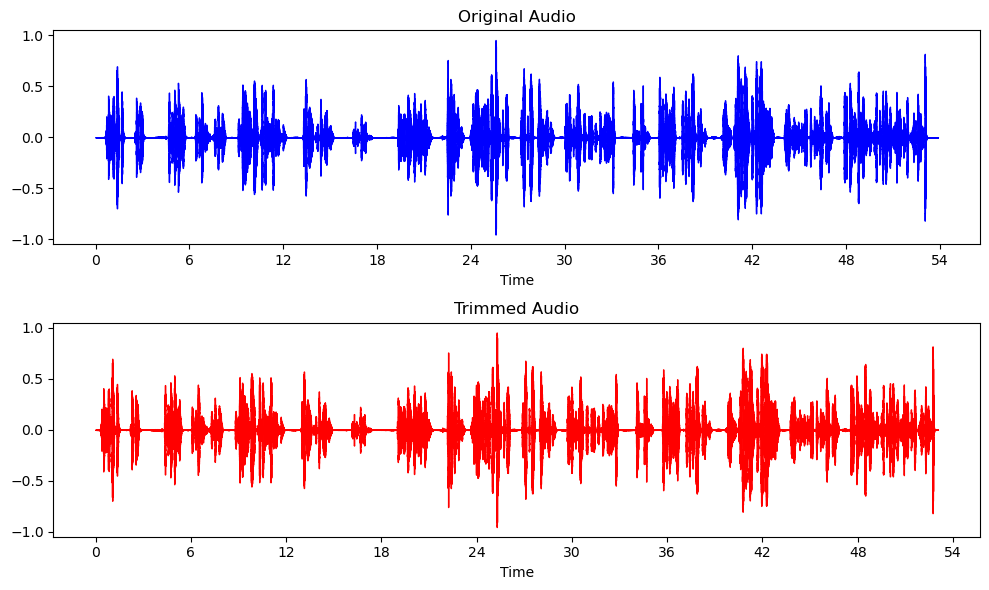

Start time: 0.32 seconds
End time: 53.376 seconds


In [8]:
# 裁剪音频信号中的静音部分
trimmed_audio, index = librosa.effects.trim(x)

# index 包含裁剪后的起始和结束样本的位置
start = index[0] / sr
end = index[1] / sr

# 显示原始和裁剪后的波形图
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(x, sr=sr, color="b")
plt.title("Original Audio")

plt.subplot(2, 1, 2)
librosa.display.waveshow(trimmed_audio, sr=sr, color="r")
plt.title("Trimmed Audio")

plt.tight_layout()
plt.show()

print(f"Start time: {start} seconds")
print(f"End time: {end} seconds")

In [9]:
trimmed_audio.shape

(424448,)

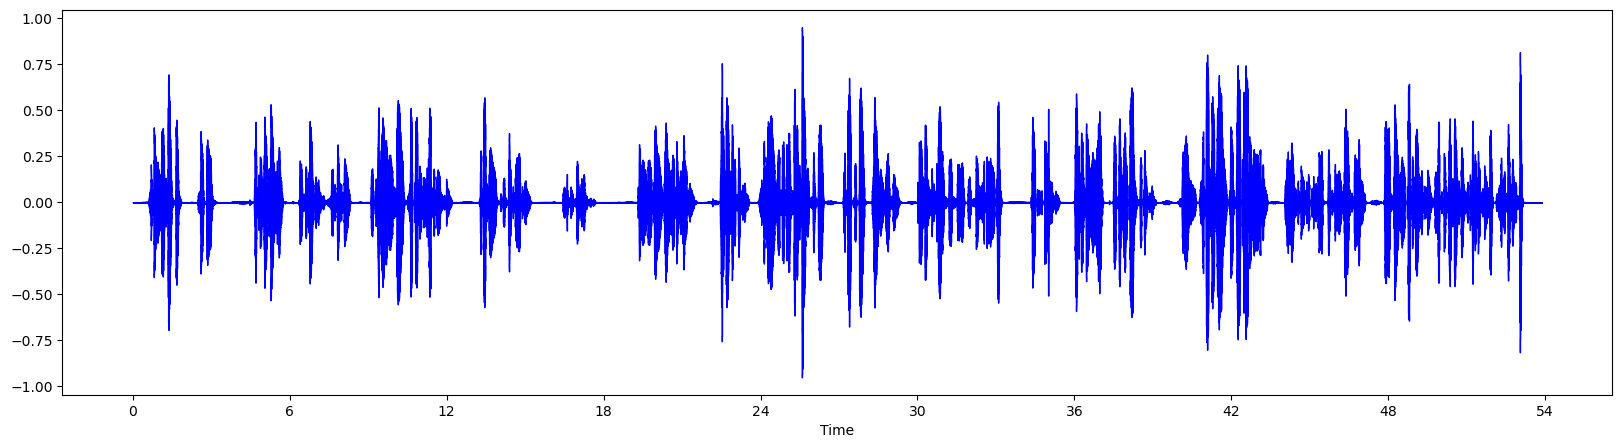

In [10]:
%matplotlib inline

import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr, color="b")
plt.show()

- 频谱图（Spectrogram）

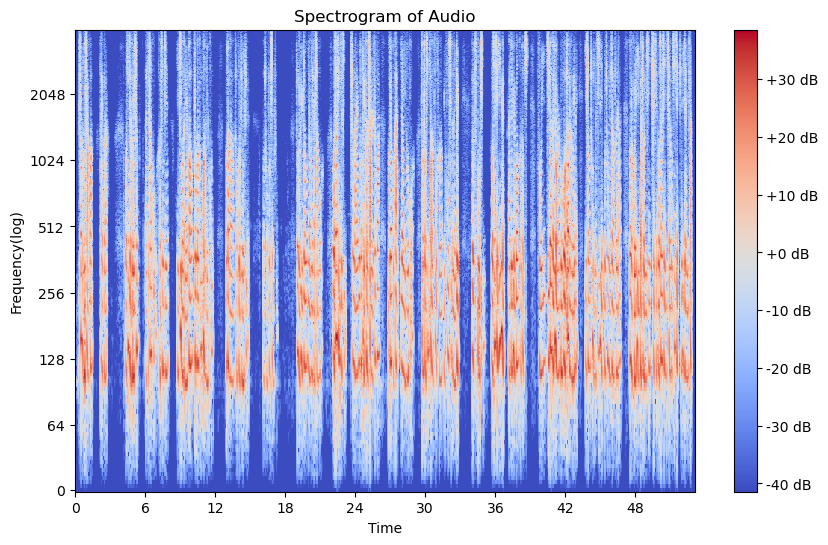

In [11]:
# 计算音频数据的短时傅里叶变换（STFT）
D = librosa.stft(trimmed_audio)

# 将STFT转换为分贝（dB）
DB = librosa.amplitude_to_db(abs(D))

# 绘制频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Audio")
plt.xlabel("Time")
plt.ylabel("Frequency(log)")
plt.show()

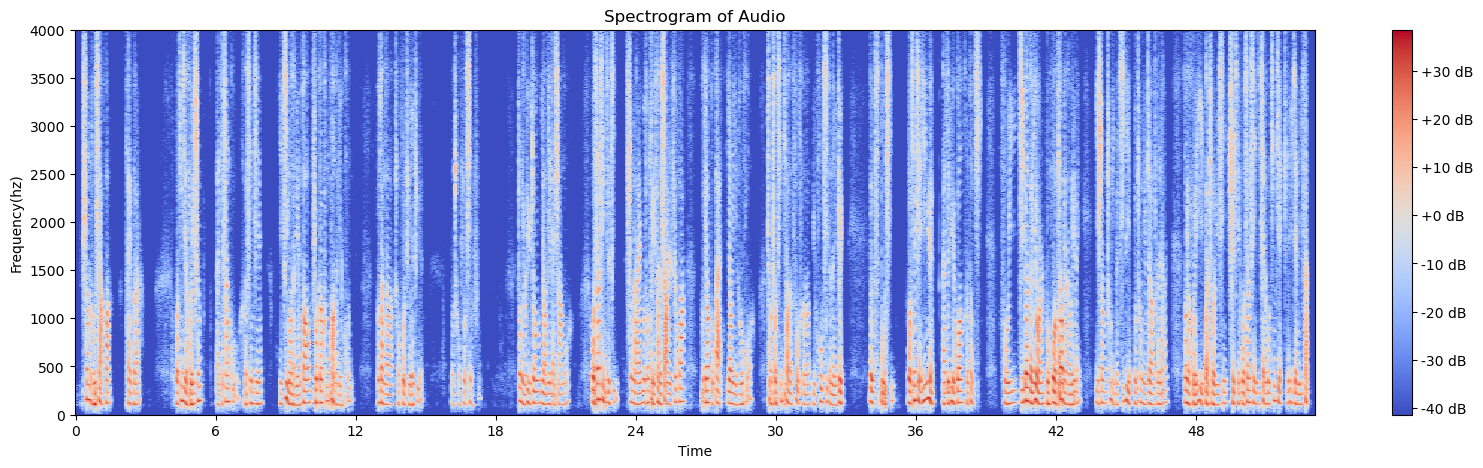

In [12]:
# 计算音频数据的短时傅里叶变换（STFT）
D = librosa.stft(trimmed_audio)

# 将STFT转换为分贝（dB）
DB = librosa.amplitude_to_db(abs(D))

# 绘制频谱图
plt.figure(figsize=(20, 5))
librosa.display.specshow(DB, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Audio")
plt.xlabel("Time")
plt.ylabel("Frequency(hz)")
plt.show()

- 梅尔频率倒谱系数（MFCC）

In [13]:
# 计算MFCC特征
mfccs = librosa.feature.mfcc(y=trimmed_audio, sr=sr, n_mfcc=13)  # 提取13个MFCC系数

mfccs

array([[-5.6179016e+02, -5.5645856e+02, -5.5615051e+02, ...,
        -5.5589386e+02, -5.7666162e+02, -5.7928149e+02],
       [ 2.3890505e+01,  3.1221355e+01,  3.1743084e+01, ...,
         2.9148041e+01,  4.2782440e+00,  7.0523500e-01],
       [ 1.9530701e+01,  2.6370800e+01,  2.7073475e+01, ...,
         1.9017696e+01,  3.8521900e+00,  6.6093743e-01],
       ...,
       [-5.1488404e+00, -8.3161297e+00, -9.8493614e+00, ...,
        -5.7606220e+00, -1.6394428e+00, -1.3127279e-01],
       [-3.8481829e+00, -8.2835150e+00, -1.0573427e+01, ...,
        -4.7566586e+00, -1.6721561e+00, -1.9201411e-01],
       [-3.1245792e+00, -8.2943287e+00, -1.0421127e+01, ...,
        -2.8719645e+00, -1.5251577e+00, -2.3076130e-01]], dtype=float32)

In [14]:
mfccs.shape

(13, 830)

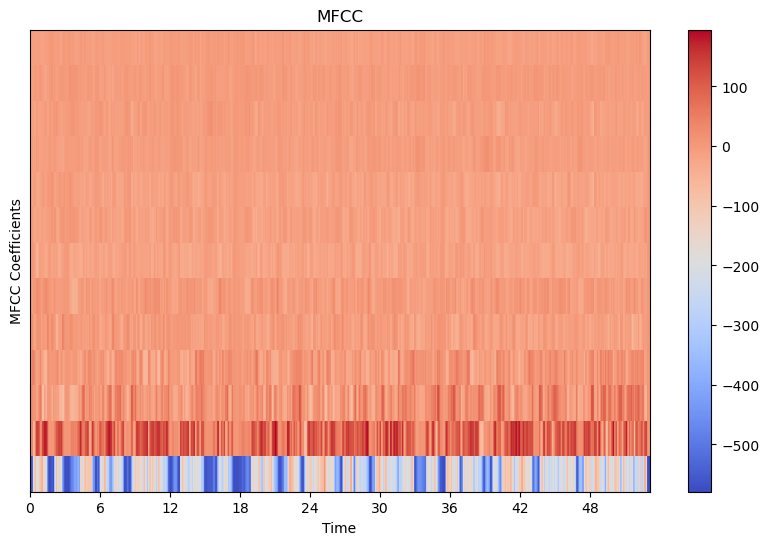

In [15]:
# 可视化MFCC特征
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis="time")
plt.colorbar()
plt.title("MFCC")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

- 过零率（zero-crossing rate，ZCR）

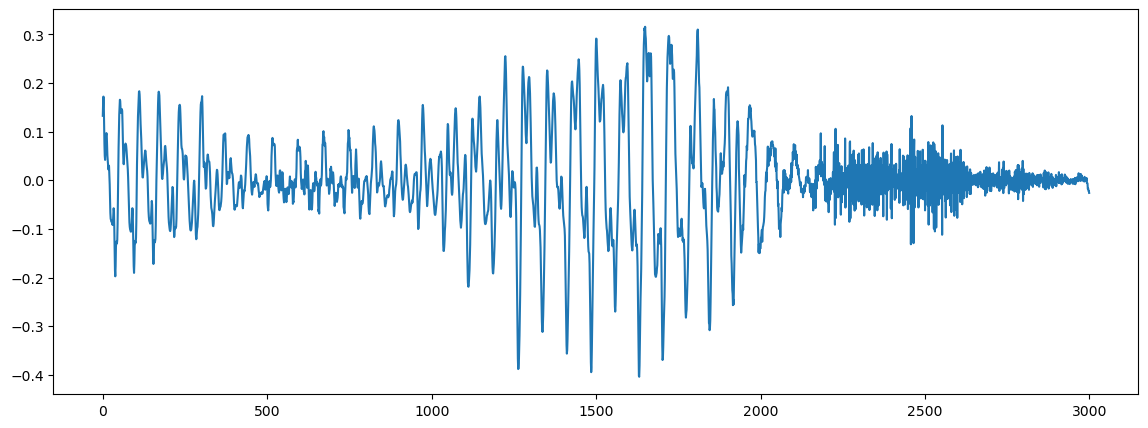

In [16]:
n0 = 5000
n1 = 8000
plt.figure(figsize=(14, 5))
plt.plot(trimmed_audio[n0:n1])
plt.show()

(1, 6)
[0.04296875 0.05615234 0.06640625 0.18505859 0.29833984 0.28515625]


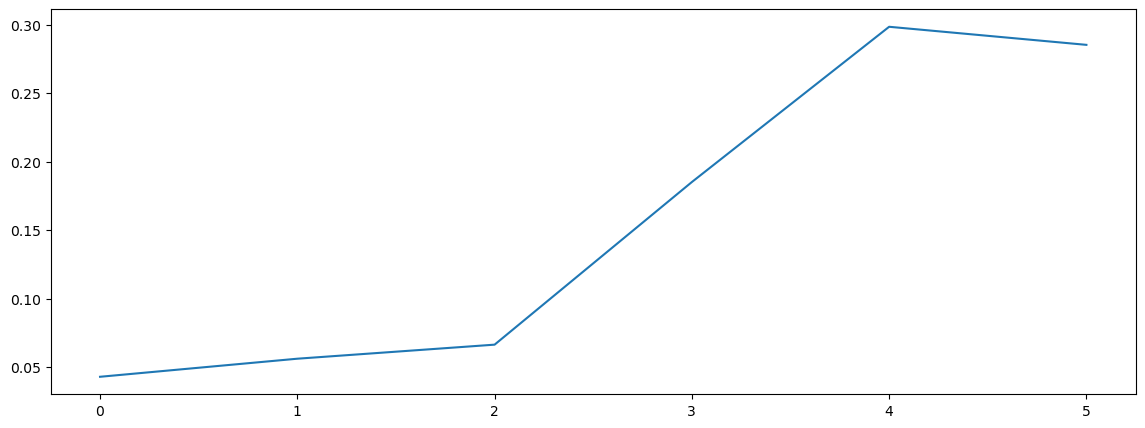

In [17]:
zero_crossings = librosa.feature.zero_crossing_rate(trimmed_audio[n0:n1])

print(zero_crossings.shape)
print(zero_crossings[0])

plt.figure(figsize=(14, 5))
plt.plot(zero_crossings[0])

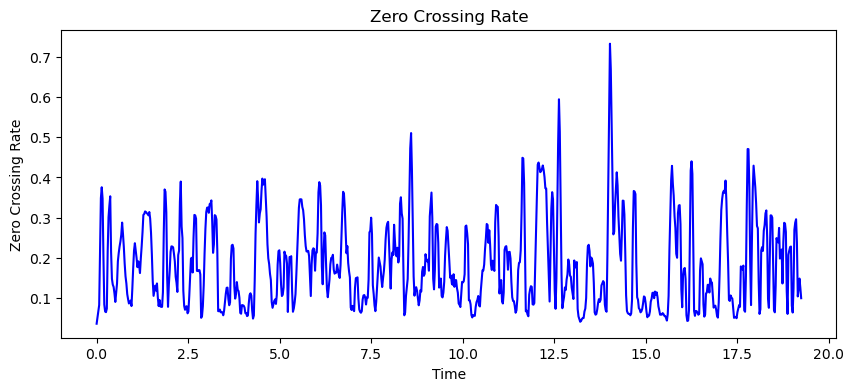

In [18]:
# 计算过零率
zero_crossings = librosa.feature.zero_crossing_rate(y=trimmed_audio)[0]

# 创建时间轴
frames = range(len(zero_crossings))
t = librosa.frames_to_time(frames)

# 绘制过零率图
plt.figure(figsize=(10, 4))
plt.plot(t, zero_crossings, color="blue")
plt.title("Zero Crossing Rate")
plt.xlabel("Time")
plt.ylabel("Zero Crossing Rate")
plt.show()

- 频谱质心（Spectral Centroid）

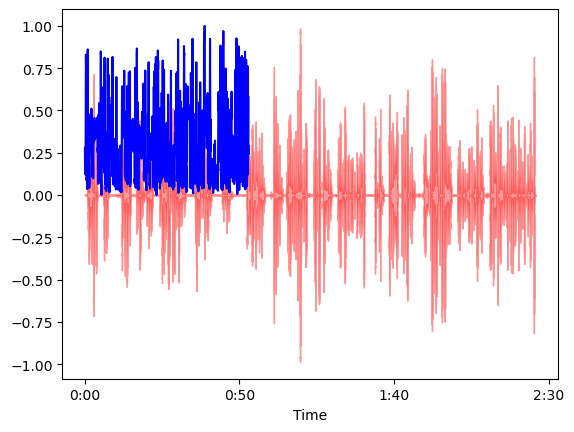

In [50]:
spectral_centroids = librosa.feature.spectral_centroid(y=trimmed_audio, sr=sr)[0]
spectral_centroids.shape

(89,)
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

import sklearn


def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


librosa.display.waveshow(trimmed_audio, sr=sr, alpha=0.4, color="r")
plt.plot(t, normalize(spectral_centroids), color="b")

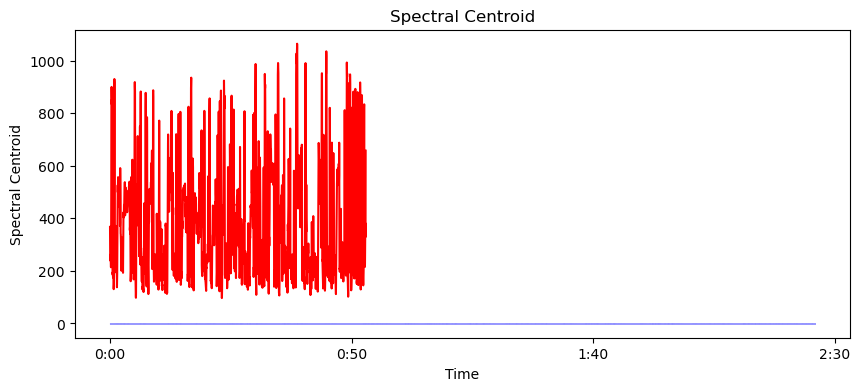

In [44]:
# 计算频谱质心
spectral_centroids = librosa.feature.spectral_centroid(y=trimmed_audio, sr=sr)[0]

# 创建时间轴
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# 绘制频谱质心
plt.figure(figsize=(10, 4))
librosa.display.waveshow(trimmed_audio, sr=sr, alpha=0.4, color="b")
plt.plot(t, spectral_centroids, color="r")
plt.title("Spectral Centroid")
plt.xlabel("Time")
plt.ylabel("Spectral Centroid")
plt.show()